# Perform expolatory analysis and lead to dimension reduction utilizing PCA


PCA is a powerful technique used for dimensionality reduction. PCA produces the main components of the data by creating new uncorrelated variables. The key aspect of these new variables is that they are ordering by the amount of variance they explain in the original features. A component is a weighted sum of the original features, called loadings. So, the first componenet explains the most variance and the second component is orthognal and uncorrelated to the first. This continues on for all Principal Components. 

PCA is able to reduce complex, high-dimensional data into a reduced feature space that maintains the core information of the data. It is vital to reducing feature spaces to a smaller set that is both possible to visualize and mathemetically useful.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from dataframe_builder import build_data_frame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df_totals, df_aggregated  =build_data_frame(r"..\data_files")

In [3]:
#remove players with less than 50 games
df50 = df_aggregated[df_aggregated['G'] >=50].copy()

#select dtypes = numeric
df50_numeric = df50.select_dtypes('number').drop(columns=['Age', 'Year'])

In [4]:
df50_numeric.columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
df50_numeric

,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,73,7,1659,182,424,155,363,27,61,22,27,18,156,174,108,37,7,40,157,541
2,73,7,1659,182,424,155,363,27,61,22,27,18,156,174,108,37,7,40,157,541
5,72,12,1401,248,533,101,259,147,274,42,47,37,116,153,73,42,12,42,87,639
6,72,12,1401,248,533,101,259,147,274,42,47,37,116,153,73,42,12,42,87,639
8,50,50,1384,231,499,59,176,172,323,97,149,77,207,284,161,33,34,97,89,618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,62,31,1346,191,424,76,242,115,182,43,55,26,103,129,65,35,12,41,113,501
3371,63,45,1541,214,520,103,302,111,218,101,123,61,226,287,84,62,28,67,149,632
3372,63,45,1541,214,520,103,302,111,218,101,123,61,226,287,84,62,28,67,149,632
3373,61,61,2026,634,1037,10,34,624,1003,369,529,167,274,441,226,57,39,167,135,1647


In [6]:
# Step 1: Select relevant features
features = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
X = df50_numeric[features]


## Now we can utilize PCA and KMeans

First PCA data must be scaled per the standard PCA process. I can manually select the number of components, but later I will use analytical techniques to determine the number of components which accurately reduces our feature space with as little loss of information as possible

Next, KMeans can be used to create clusters utilizin the K_Means algorithm. I can manually set the number of clusters for a first pass. However, later I will analyze the cluster score and determine which number of clusters is appropriate. To start I will use 6 KMeans clusters.

I will graph the data in 2D and 3D to help visualize the reduced feature space and see the clusters generated by KMeans

In [17]:
# 1. Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3. KMeans on PCA components
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add clusters to DataFrame
df50_numeric['Cluster'] = clusters

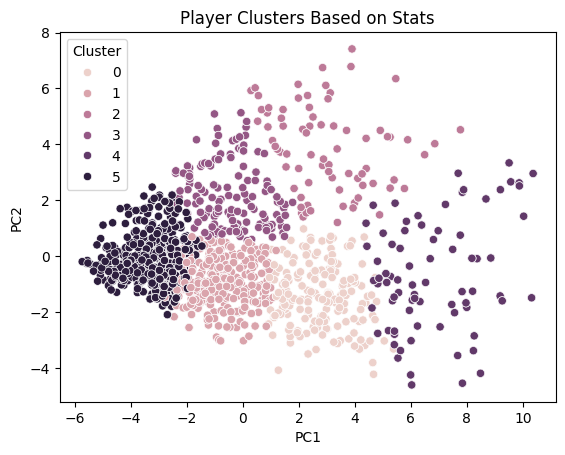

In [18]:
# Reduce to 2D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df50_numeric['PC1'] = X_pca[:, 0]
df50_numeric['PC2'] = X_pca[:, 1]

# Scatter plot
sns.scatterplot(data=df50_numeric, x='PC1', y='PC2', hue='Cluster')
plt.title("Player Clusters Based on Stats")
plt.show()

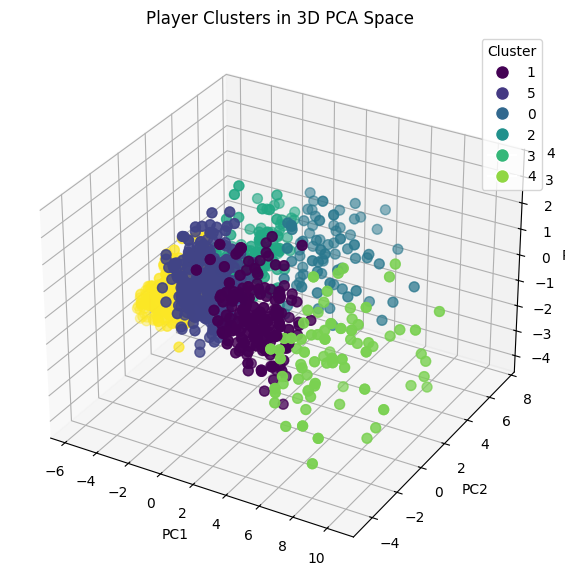

In [ ]:
# Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PC columns to DataFrame
df50_numeric['PC1'] = X_pca[:, 0]
df50_numeric['PC2'] = X_pca[:, 1]
df50_numeric['PC3'] = X_pca[:, 2]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot using PC1, PC2, and PC3
scatter = ax.scatter(
    df50_numeric['PC1'],
    df50_numeric['PC2'],
    df50_numeric['PC3'],
    c=df50_numeric['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_title("Player Clusters in 3D PCA Space")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Optional: create a legend
legend_labels = df50_numeric['Cluster'].unique()
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=plt.cm.viridis(i / len(legend_labels)), markersize=10)
    for i, label in enumerate(legend_labels)
]
ax.legend(handles=legend_handles, title="Cluster")

plt.show()


In [21]:
fig = px.scatter_3d(
    df50_numeric,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    title="Interactive 3D PCA Player Clusters",
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))
fig.show()


# Analyzing PCA

PCA can produce a high number of components, but the goal is to reduce the number of the original feature space.

Without designating the number of components, PCA will produce the same number as the original space. However, a Scree plot shows that each additional component is not adding a significant amount of explanatory information. Essentially, we want to reduce the variables while optimizing the amount of explain variance. In the Scree plot we see that the explained variance of the data is primarily from PC1 at over 56%. Next, PC2 explains 21%. Together these explain 77% of the variance. Looking into the data, PC11 and later can be rounded to explaining 0%. Generally, a reduced dimension space that explains over 80% of the variance is considering computationally useful and informatioanlly valid. 

Also, a heuristic of the elbow method on the Scree plot can be used. This method indicates that when the explain variance gained from one PC to the next is only adding a small amount, and the graph starts to represent an elbow, we can stop utilizng additional components. The curve flattens at this point and the rate of return on adding additional components and complexity is reduced. 

Here, utilizing three components produces 84% of the explained variance and follows this elbow method.

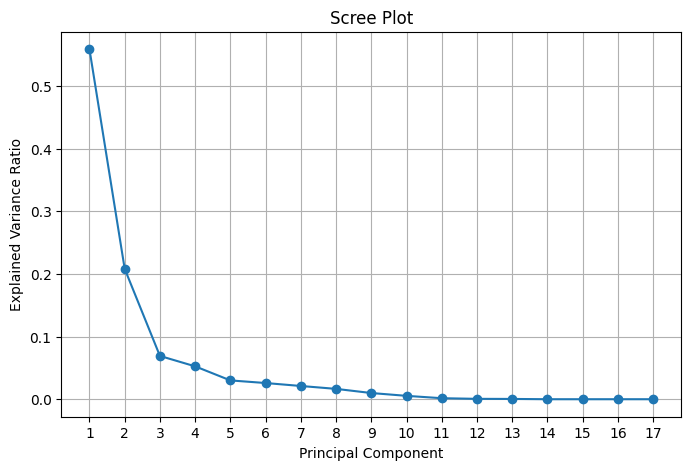

In [25]:
# RUN PCA again, but do not designate the number of components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

In [30]:
np.round(pca.explained_variance_ratio_,2)

array([0.56, 0.21, 0.07, 0.05, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

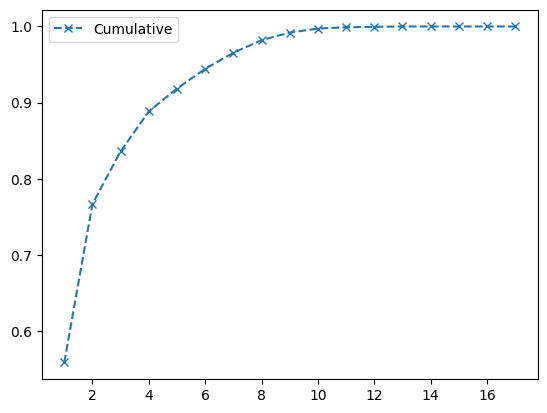

In [27]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='x', linestyle='--', label='Cumulative')
plt.legend()

### There are 3 main principal components

The features that load onto the component in the same positive or negative direction correlate in the same manner.

PC 1 is primarily related to high usage players with high stats across points, rebounds, and assists, and turnovers.

PC 2 is primarily related to players with high rebounds and blocks statistics. This was previously explored in correlation heatmaps and is related to player height and player location

PC 3 is primarily related to players known as 3 and D. These players shoot a high volume of 3 point shots and play as a primary defender. They are able to maintain their place on the team fulfilling the spacing requirement of modern NBA on offense and defending the best players on defence. These players have high steals, blocks, and fouls to indicate their defensive presence.

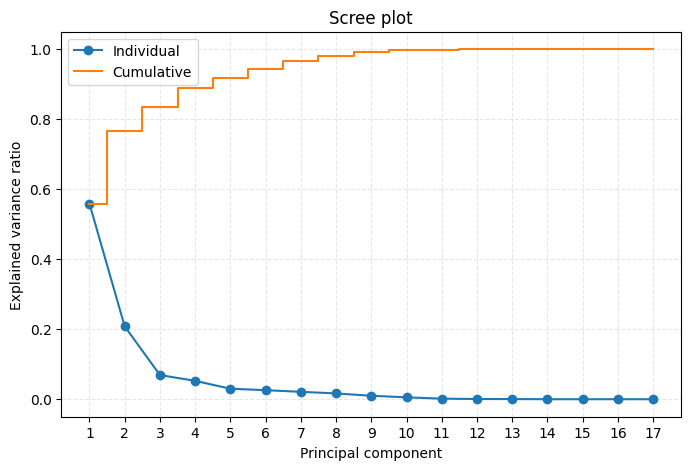

,PC1,PC2,PC3
FG,+0.313,-0.069,-0.019
FGA,+0.301,-0.168,+0.030
3P,+0.139,-0.393,+0.410
3PA,+0.149,-0.395,+0.387
2P,+0.298,+0.109,-0.219
2PA,+0.303,+0.047,-0.227
FT,+0.285,-0.045,-0.291
FTA,+0.288,+0.006,-0.292
ORB,+0.110,+0.455,+0.117
DRB,+0.237,+0.275,+0.170


Top |loadings| on PC1:
FG     0.313024
PTS    0.310960
2PA    0.302704
FGA    0.300669
2P     0.297869
TOV    0.288014
FTA    0.287852
FT     0.284825
DRB    0.237005
AST    0.234904
Name: PC1, dtype: float64


In [34]:
pca = PCA()                 # keep all components
pca.fit(X_scaled)

# ------------------------------------------------------------------
# 2. Scree plot – variance explained by each component
# ------------------------------------------------------------------
explained = pca.explained_variance_ratio_
cumu      = explained.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o', label='Individual')
plt.step(np.arange(1, len(cumu)+1), cumu, where='mid', label='Cumulative')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.xticks(range(1, len(explained)+1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.show()

# ------------------------------------------------------------------
# 3. Loadings – feature weights on each PC
# ------------------------------------------------------------------
loadings = pd.DataFrame(
    pca.components_.T,                # transpose so rows = features
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features
)

# Inspect 3 main components – absolute value helps see strongest drivers
display(loadings.iloc[:, :3].style.format("{:+.3f}").background_gradient(cmap="PuBu"))

# TOP loadings of PC1
print("Top |loadings| on PC1:")
print(loadings['PC1'].apply(abs).sort_values(ascending=False).head(10)) #type:ignore


# Analyzing KMeans scores

There are two techniques commonly utilized to analyze KMeans and the optimal number clusters. First we will utilize the Elbow Method and next the Silhouette Score.


For a Silhoette score, this utilizes a range generally from 0 to 1 with 1 indicating the best score. The inertia method utilizes a similar Elbow heuristic wich we see here at 2 or 3. 

So, according to these methods, the number of clusters at either 2 or 3 produce the best clusters. We saw from PC that we can load 3 distinct player types on the components. Therefore, utilizng 3 clusters will help determine the players.

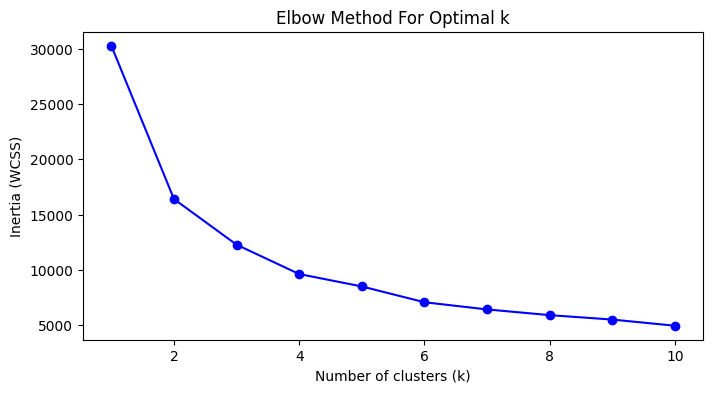

In [22]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()


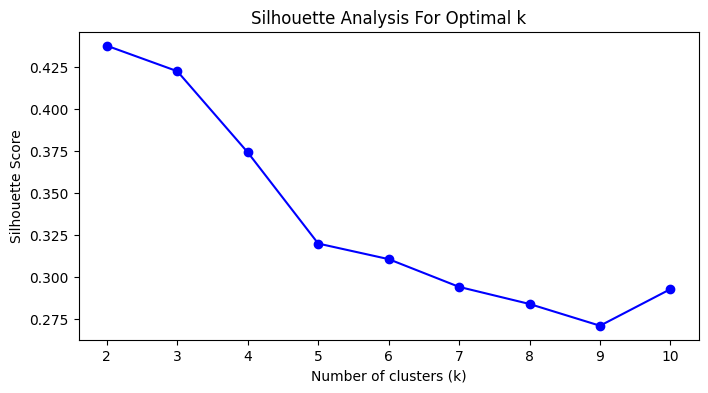

In [23]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # silhouette not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


# Now run the PCA with 3 dimensions and 3 clusters

In [40]:
# Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add clusters to DataFrame
df50_numeric['Cluster'] = clusters

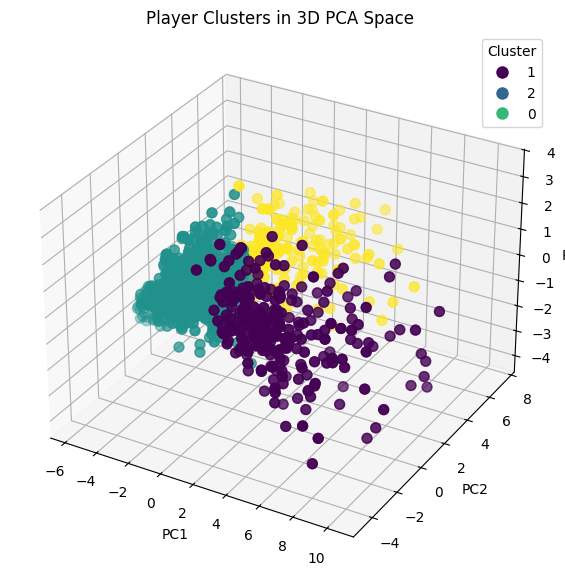

In [41]:
# Add PC columns to DataFrame
df50_numeric['PC1'] = X_pca[:, 0]
df50_numeric['PC2'] = X_pca[:, 1]
df50_numeric['PC3'] = X_pca[:, 2]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot using PC1, PC2, and PC3
scatter = ax.scatter(
    df50_numeric['PC1'],
    df50_numeric['PC2'],
    df50_numeric['PC3'],
    c=df50_numeric['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_title("Player Clusters in 3D PCA Space")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Optional: create a legend
legend_labels = df50_numeric['Cluster'].unique()
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=plt.cm.viridis(i / len(legend_labels)), markersize=10)
    for i, label in enumerate(legend_labels)
]
ax.legend(handles=legend_handles, title="Cluster")

plt.show()
